In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv(r'C:\Users\mohit\OneDrive\Desktop\Omdena-AI\omdena-colombia-career-recommender-system\src\data\real data\saber_combined_all_fields.csv')

In [3]:
df.head()

,serial_number,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,estu_exterior,periodo,estu_consecutivo,estu_estadocivil,estu_estudiante,...,punt_biologia,punt_quimica,punt_fisica,punt_ciencias_sociales,punt_filosofia,punt_ingles,desemp_ingles,profundiza,puntaje_prof,desemp_prof
0,0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,49.0,NaN
1,1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Soltero,ESTUDIANTE,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
2,2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Soltero,ESTUDIANTE,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I
3,3,TI,COLOMBIA,F,10/01/1996,NaN,20134,EK201340237996,Soltero,ESTUDIANTE,...,34.0,35.0,45.0,42.0,40.0,43.0,A-,PUNT_INTERDISC_VIOLENCIAYSOC,29.0,NaN
4,4,CC,COLOMBIA,M,11/10/1995,NO,20173,EK201730119521,NaN,ESTUDIANTE,...,57.0,65.0,44.0,49.0,43.0,42.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,55.0,NaN


In [4]:
df.isnull().sum()

serial_number                0
estu_tipodocumento           0
estu_nacionalidad            0
estu_genero                  3
estu_fechanacimiento       121
                         ...  
punt_ingles                  0
desemp_ingles               22
profundiza                   0
puntaje_prof                 0
desemp_prof             114055
Length: 144, dtype: int64

In [5]:
df.nunique()

serial_number           212010
estu_tipodocumento           7
estu_nacionalidad           35
estu_genero                  2
estu_fechanacimiento      5856
                         ...  
punt_ingles                 67
desemp_ingles                5
profundiza                   6
puntaje_prof                63
desemp_prof                  4
Length: 144, dtype: int64

In [6]:
df.shape

(212010, 144)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212010 entries, 0 to 212009
Columns: 144 entries, serial_number to desemp_prof
dtypes: float64(26), int64(7), object(111)
memory usage: 232.9+ MB


In [8]:
def removingNullandUnique(col,categorical_col):
    # For NULL values we will keep those columns which has around 60% of NAN data

    n =int( 0.6 * df.shape[0])

    # For Unique values we will keep only those columns which has around 30% of unique values
    p = int(0.3 * df.shape[0])

    
    for i in range(len(col)):
        if df[col[i]].isnull().sum() > n:
            df.drop([col[i]] , axis= 1 , inplace= True)

    for i in range(len(categorical_col)):
        if df[categorical_col[i]].nunique() > p:
            df.drop([categorical_col[i]] , axis=1 , inplace=True)

In [9]:
# as we can see thorugh df.nunique and df.isnull().sum() that we are having lot of NULL values and unique values so maybe we can remove them but actually we all have to talk together about that as we will lose about 22 columns after that



# uncomment down written line if we are going to remove those columns which has huge amount of NULL values

# col = df.columns
# categorical_col = df.select_dtypes('object').columns
# removinfNullandUnique(col,categorical_col)

# Let's Translate the Headers

In [10]:
import ast
pd.set_option('display.max_rows', 750)

# open the file using open
file = open(r"C:\Users\mohit\OneDrive\Desktop\Omdena-AI\omdena-colombia-career-recommender-system\src\data\translate_headers.txt", "r")
contents = file.read()
file.close()

# now we will take all those headers in the form of dictionary 
my_headers = ast.literal_eval(contents)

# let's converts those heading into lower case as the headers are saved in capital in the txt file
my_headers_low = ast.literal_eval(contents.lower()) 

# now let's convert the headers
df = df.rename(columns=my_headers_low)#, inplace=True)

In [11]:
df.head()

,serial_number,your_type_of_document,your_nationality,your_gender,your_birthdate,your_exterior,period,your_consecutive,your_marital_status,your_student,...,score_biology,score_chemistry,score_physical,score_social_science,score_philosophy,score_english,performance_english,go_deep,score_prof,performance_prof
0,0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,49.0,NaN
1,1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Soltero,ESTUDIANTE,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
2,2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Soltero,ESTUDIANTE,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I
3,3,TI,COLOMBIA,F,10/01/1996,NaN,20134,EK201340237996,Soltero,ESTUDIANTE,...,34.0,35.0,45.0,42.0,40.0,43.0,A-,PUNT_INTERDISC_VIOLENCIAYSOC,29.0,NaN
4,4,CC,COLOMBIA,M,11/10/1995,NO,20173,EK201730119521,NaN,ESTUDIANTE,...,57.0,65.0,44.0,49.0,43.0,42.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,55.0,NaN


# Categorical Features

In [12]:
categorical_col = df.select_dtypes('object').columns

In [13]:
len(categorical_col)

111

In [14]:
# So we have around 111 columns of 'object' datatype

In [15]:
categorical_col

Index(['your_type_of_document', 'your_nationality', 'your_gender',
       'your_birthdate', 'your_exterior', 'your_consecutive',
       'your_marital_status', 'your_student', 'your_country_resides',
       'your_have_ethnicity',
       ...
       'cole_character', 'cole_name_campus', 'cole_main_campus',
       'cole_area_location', 'cole_journey', 'cole_municipality_location',
       'cole_dept_location', 'performance_english', 'go_deep',
       'performance_prof'],
      dtype='object', length=111)

# Numerical Features

In [16]:
numerical_col = df.select_dtypes('number').columns

In [17]:
len(numerical_col)

33

In [18]:
# So we have around 33 columns of numerical features and out of them 7 columns are of int datatype and 26 of float datatype

In [19]:
numerical_col

Index(['serial_number', 'period', 'your_dept_code_resides',
       'your_municipality_code_resides', 'your_year_exam_sb11',
       'your_on_semester', 'inst_institution_code', 'your_prgm_academic_snies',
       'your_prgm_municipality_code', 'your_inst_municipality_code',
       'mod_reason_quantitat_point', 'mod_reading_review_point',
       'mod_compete_citizen_point', 'mod_english_point',
       'mod_communi_written_point', 'your_inst_department_code', 'period.1',
       'your_dept_code_resides.1', 'your_municipality_code_resides.1',
       'cole_code_icfes', 'cole_dane_code_establishment',
       'cole_dane_code_campus', 'cole_municipality_code_location',
       'cole_dept_code_location', 'score_language', 'score_mathematics',
       'score_biology', 'score_chemistry', 'score_physical',
       'score_social_science', 'score_philosophy', 'score_english',
       'score_prof'],
      dtype='object')

# Int Columns

In [20]:
int_col = df.select_dtypes('int64').columns

In [21]:
len(int_col)

7

In [22]:
int_col

Index(['serial_number', 'period', 'inst_institution_code',
       'your_prgm_municipality_code', 'your_inst_municipality_code',
       'your_inst_department_code', 'period.1'],
      dtype='object')

# Float Columns

In [23]:
float_col = df.select_dtypes('float64').columns

In [24]:
len(float_col)

26

In [25]:
float_col

Index(['your_dept_code_resides', 'your_municipality_code_resides',
       'your_year_exam_sb11', 'your_on_semester', 'your_prgm_academic_snies',
       'mod_reason_quantitat_point', 'mod_reading_review_point',
       'mod_compete_citizen_point', 'mod_english_point',
       'mod_communi_written_point', 'your_dept_code_resides.1',
       'your_municipality_code_resides.1', 'cole_code_icfes',
       'cole_dane_code_establishment', 'cole_dane_code_campus',
       'cole_municipality_code_location', 'cole_dept_code_location',
       'score_language', 'score_mathematics', 'score_biology',
       'score_chemistry', 'score_physical', 'score_social_science',
       'score_philosophy', 'score_english', 'score_prof'],
      dtype='object')

# Data Visualization

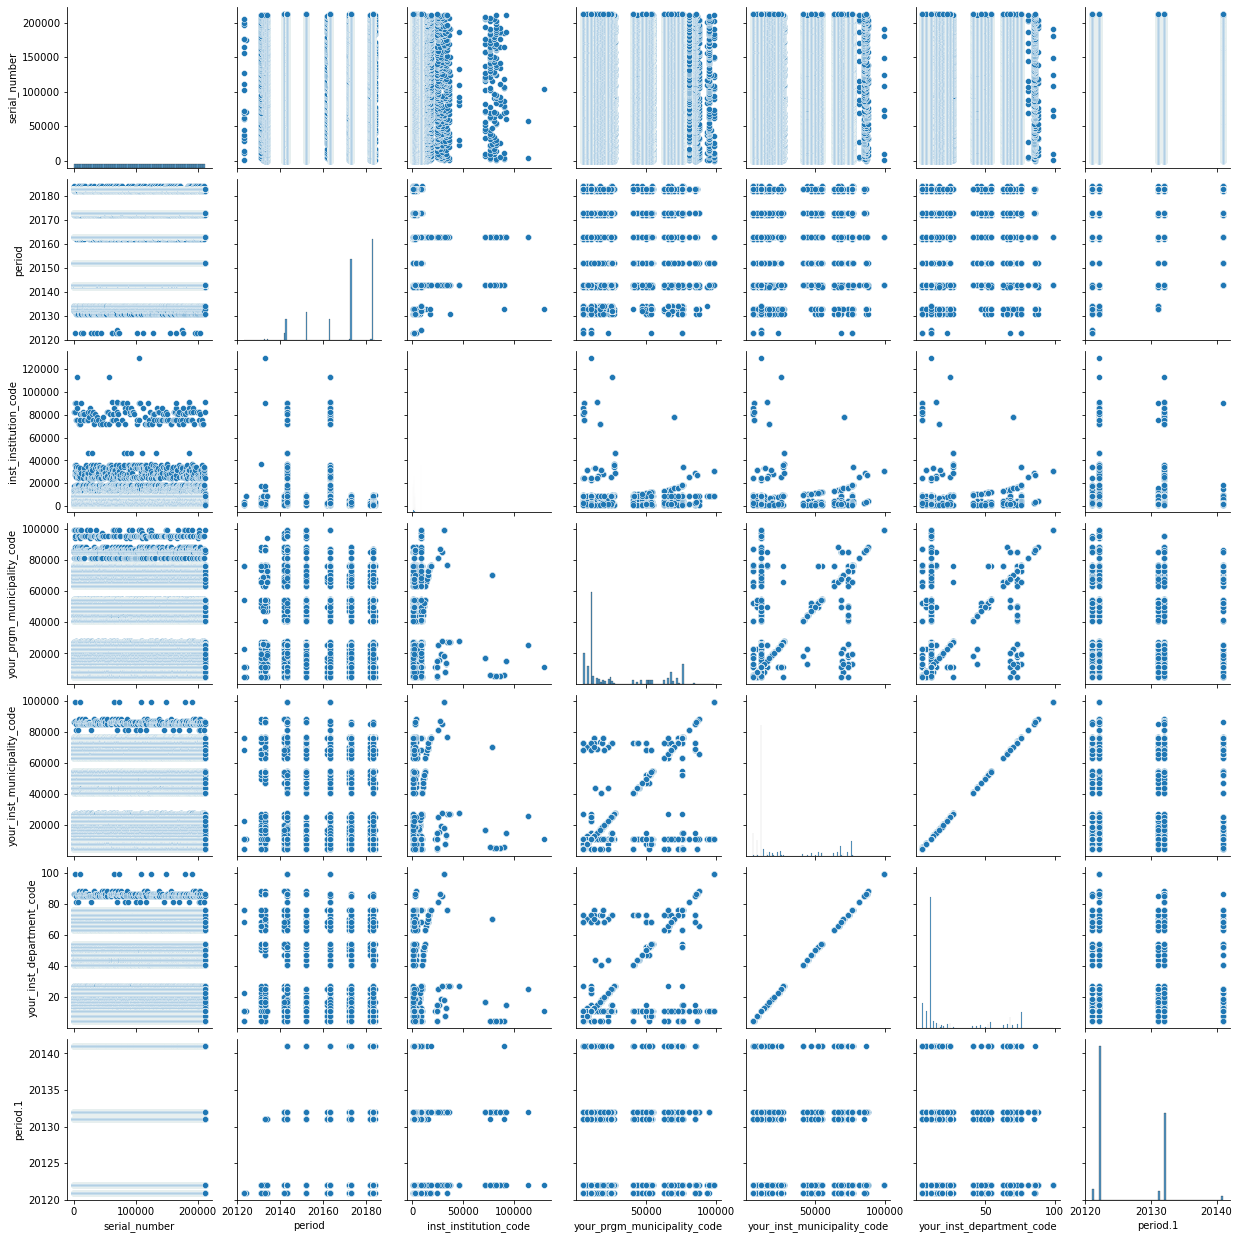

In [26]:
# we can use this to check the correlation between each of the int_col

sns.pairplot(df[int_col])

In [27]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Heatmap of Important Integer Columns

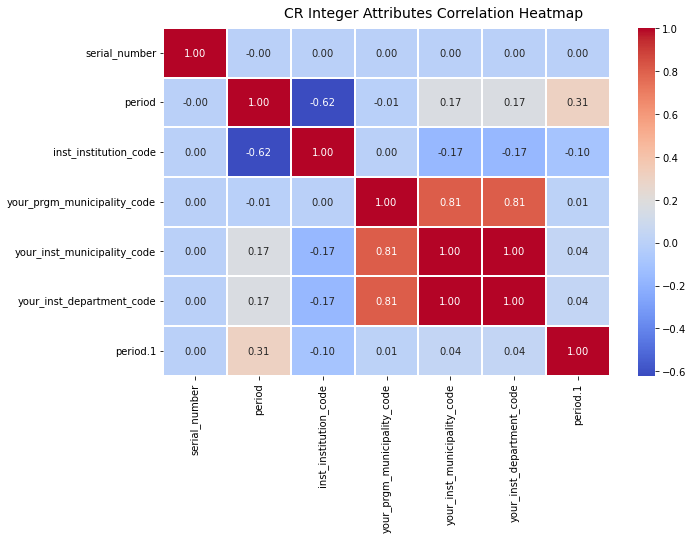

In [28]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df[int_col].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('CR Integer Attributes Correlation Heatmap', fontsize=14)

# Heatmap of Important Float Columns

In [29]:
float_col

Index(['your_dept_code_resides', 'your_municipality_code_resides',
       'your_year_exam_sb11', 'your_on_semester', 'your_prgm_academic_snies',
       'mod_reason_quantitat_point', 'mod_reading_review_point',
       'mod_compete_citizen_point', 'mod_english_point',
       'mod_communi_written_point', 'your_dept_code_resides.1',
       'your_municipality_code_resides.1', 'cole_code_icfes',
       'cole_dane_code_establishment', 'cole_dane_code_campus',
       'cole_municipality_code_location', 'cole_dept_code_location',
       'score_language', 'score_mathematics', 'score_biology',
       'score_chemistry', 'score_physical', 'score_social_science',
       'score_philosophy', 'score_english', 'score_prof'],
      dtype='object')

In [30]:
imp_float_col = ['score_language' , 'score_mathematics' , 'score_biology' ,'score_chemistry','score_physical' ,'score_social_science'  ,'score_english' , 'your_prgm_academic_snies','your_year_exam_sb11','your_on_semester','mod_reason_quantitat_point', 'mod_reading_review_point','mod_compete_citizen_point', 'mod_english_point','mod_communi_written_point','score_prof','score_philosophy']

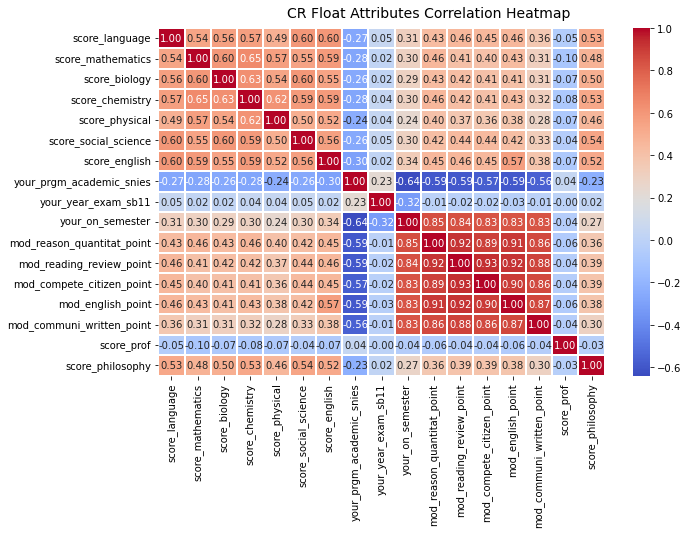

In [31]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df[imp_float_col].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('CR Float Attributes Correlation Heatmap', fontsize=14)

In [32]:
# We will write here all the insights that we will get or maybe we can make a new markdown file for storing our analysis and insights for this

# Heatmap of Important Categorical Columns

In [33]:
categorical_col

Index(['your_type_of_document', 'your_nationality', 'your_gender',
       'your_birthdate', 'your_exterior', 'your_consecutive',
       'your_marital_status', 'your_student', 'your_country_resides',
       'your_have_ethnicity',
       ...
       'cole_character', 'cole_name_campus', 'cole_main_campus',
       'cole_area_location', 'cole_journey', 'cole_municipality_location',
       'cole_dept_location', 'performance_english', 'go_deep',
       'performance_prof'],
      dtype='object', length=111)

In [34]:
for i in range(len(categorical_col)):
    print(categorical_col[i])

your_type_of_document
your_nationality
your_gender
your_birthdate
your_exterior
your_consecutive
your_marital_status
your_student
your_country_resides
your_have_ethnicity
your_dept_resides
your_municipality_resides
your_high_school_degree
your_semester_exam__b11
your_percentage_credits_approved
your_tuition_cost_university
your_tuition_pymt_scholarship
your_tuition_pymt_credit
your_tuition_pymt_parents
your_tuition_pymt_yourself
your_i_take_course_preparation
your_course_teacher_ies
your_course_external_support_ies
your_course_external_ies
your_simulation_type_icfes
your_activity_strengths_areas
your_activity_strengths_generic
fami_current_household_type
fami_is_the_head_family
fami_econ_dependents
fami_father_education
fami_mother_education
fami_father_occupation
fami_mother_occupation
fami_father_work
fami_mother_work
fami_housing_stratum
fami_social_stratum_sisben_y
fami_internet
fami_computer
fami_have_oven
fami_automobile
fami_fridge
fami_mobile
fami_num_books
fami_landline_phone
